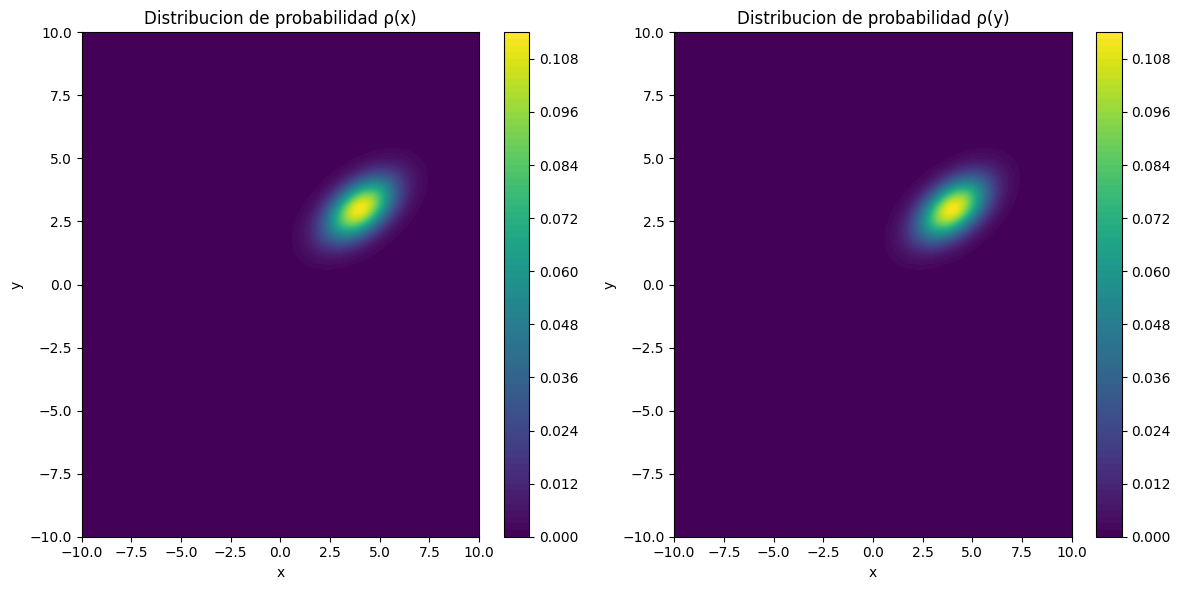

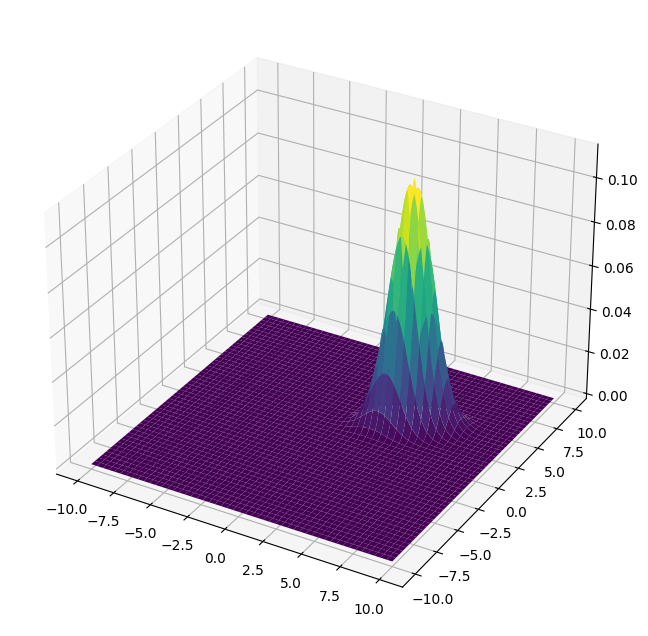

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Definiciones de los valores para el caso en consideración
cxx = 2
cyy = 1
cxy = 1.4
mux = 3
muy = 4

# Definición de la marginalización en y
def rho(x, y):
  '''Funcion que devuelve la marginalización sobre y'''
  return 1 / (2 * np.pi * np.sqrt(2)) * np.exp(
        -0.5 * (2 * (x - mux)**2 - 1.4 * (x - mux) * (y - muy) + (y - muy)**2))

# creación de listas para evaluar y crear las gráficas
x_values = np.linspace(-10, 10, 400)
y_values = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_values, y_values)
Z_rho_x = np.zeros(X.shape)
Z_rho_y = np.zeros(X.shape)

# para calcular ρ(x) y ρ(y)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z_rho_x[i, j] = rho(x_values[i], y_values[j])
        Z_rho_y[i, j] = rho(y_values[i], x_values[j])

# configuracion para la visualización de las distribuciones
plt.figure(figsize=(12, 6))

# para graficar ρ(x)
plt.subplot(1, 2, 1)
plt.contourf(X, Y, Z_rho_x, levels=100, cmap='viridis')
plt.colorbar()
plt.title('Distribucion de probabilidad ρ(x)')
plt.xlabel('x')
plt.ylabel('y')

# para gradicar ρ(y)
plt.subplot(1, 2, 2)
plt.contourf(X, Y, Z_rho_y, levels=100, cmap='viridis')
plt.colorbar()
plt.title('Distribucion de probabilidad ρ(y)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# Para la grafica 3d
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# superficie 3d (generacion)
ax.plot_surface(X, Y, Z_rho, cmap='viridis')

